<a href="https://colab.research.google.com/github/aniilkeles/Python_Linear_Regression/blob/main/23_StudyLineerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Summary of Weather.csv')

/tmp/ipython-input-2412649003.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/Summary of Weather.csv')


In [35]:
df.head() # predict max temperature when the min temperature given

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [37]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [38]:
df.isnull().sum()

,0
STA,0
Date,0
Precip,0
WindGustSpd,118508
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,1163
PoorWeather,84803
YR,0


In [51]:
drop_list = ['FT','FB','FTI','ITH','PGT','SD3','RHX','RHN','RVG','WTE']
drop_list2=  ['DR','SPD','SND','TSHDSBRSGF']


In [48]:
df = df.drop(columns=drop_list2)

In [49]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'MAX',
       'MIN', 'MEA', 'SNF'],
      dtype='object')

In [50]:
df.isnull().sum()

,0
STA,0
Date,0
Precip,0
WindGustSpd,118508
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,1163
PoorWeather,84803
YR,0


In [53]:
df.drop('WindGustSpd',axis=1,inplace=True)

In [59]:
df.drop(columns=['PoorWeather'],axis=1,inplace=True)

In [60]:
df.isnull().sum()

,0
STA,0
Date,0
Precip,0
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,1163
YR,0
MO,0
DA,0


In [65]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 13.6+ MB


In [67]:
df['SNF'].unique()

array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
       '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1',
       '2.3', '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2',
       '1.4', '3.1', '1.6', '3.4', '3.3', '2.7', 'T', 0.4, 0.3, 0.6, 0.1,
       0.2, 0.5], dtype=object)

In [69]:
df.shape

(119040, 15)

In [76]:
df['Date'].head()

,Date
0,1942-7-1
1,1942-7-2
2,1942-7-3
3,1942-7-4
4,1942-7-5


In [77]:
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
df['Date'].head()

,Date
0,1942-07-01
1,1942-07-02
2,1942-07-03
3,1942-07-04
4,1942-07-05


In [81]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [82]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0.0,1,7,1942
1,10001,1942-07-02,0,28.888889,21.666667,25.555556,0.0,42,7,2,0,84.0,71.0,78.0,0.0,2,7,1942
2,10001,1942-07-03,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,0.1,79.0,72.0,76.0,0.0,3,7,1942
3,10001,1942-07-04,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,0.1,80.0,72.0,76.0,0.0,4,7,1942
4,10001,1942-07-05,0,26.666667,21.666667,24.444444,0.0,42,7,5,0,80.0,71.0,76.0,0.0,5,7,1942


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  object        
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      117108 non-null  object        
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117877 non-null  object        
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [89]:
df[['SNF','PRCP','Precip','Snowfall']].value_counts()

,,,,count
SNF,PRCP,Precip,Snowfall,
0.0,0,0,0.0,44956
0,0,0,0,16189
0.0,T,T,0.0,11356
0,T,T,0,4609
0.0,0.01,0.254,0.0,2271
...,...,...,...,...
3,0,0,76.2,1
2.9,0.18,4.572,73.66,1
2.7,0,0,68.58,1


In [92]:
chars_to_remove = {'T'}
cols_to_clean = {"PRCP","Precip"}

In [93]:
for item in chars_to_remove:
  for cols in cols_to_clean:
    df[cols] = df[cols].str.replace(item,"")

In [100]:
df['Precip']= pd.to_numeric(df['Precip'],errors='coerce')

In [101]:
df['Precip']=df['Precip'].astype(float)

In [104]:
df['PRCP'] = pd.to_numeric(df['PRCP'],errors='coerce') # pandasın to_numeric fonksiyonu float yapılamayan her şeyi NaN yapar

In [105]:
df['PRCP'] = df['PRCP'].astype(float)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    102287 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117877 non-null  object        
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      100355 non-null  float64       
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117877 non-null  object        
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [110]:
df.SNF.unique()

array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
       '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1',
       '2.3', '2.6', '3', '3.2', '2.9', '2.5', '2', '1.9', '2.4', '2.2',
       '1.4', '3.1', '1.6', '3.4', '3.3', '2.7', 'T', 0.4, 0.3, 0.6, 0.1,
       0.2, 0.5], dtype=object)

In [111]:
df.Snowfall.unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [114]:
df['SNF'] = df['SNF'].replace('T',np.nan)
df['Snowfall'] = df['Snowfall'].replace('#VALUE!',np.nan)

In [117]:
df.SNF = df.SNF.astype(float)

In [119]:
df.Snowfall = df.Snowfall.astype(float)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    102287 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117833 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      100355 non-null  float64       
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117833 non-null  float64       
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

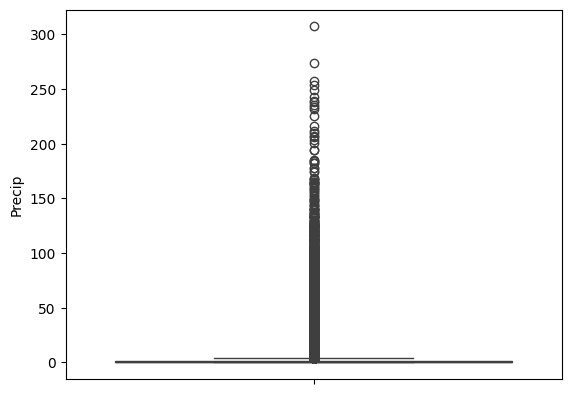

In [128]:
sns.boxplot(data=df,y="Precip")
plt.show()

In [153]:
df['Precip']= df['Precip']/1000000

In [172]:
df['Precip'] = df['Precip'].map(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else 'NaN')

In [176]:
df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')

In [177]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True, precision=2)

In [184]:
df['Precip'].isnull().sum()

np.int64(16753)

In [185]:
df['Precip']=df['Precip'].fillna(0) # Veri setimizdeki Precip kolonunda medyanımız 0 veri setimizin yüzde 50 sinden fazlasının 0 olduğu için burda null olan kısımları 0 ile doldurdum

In [186]:
df['Precip'].isnull().sum()

np.int64(0)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  117833 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      100355 non-null  float64       
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117833 non-null  float64       
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [192]:
df['Snowfall'].describe()

,Snowfall
count,117833.00
mean,0.25
std,2.63
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,86.36


In [193]:
df['Snowfall'] = df['Snowfall'].fillna(0)

In [194]:
df['Snowfall'].isnull().sum()

np.int64(0)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      100355 non-null  float64       
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117833 non-null  float64       
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [199]:
df['PRCP'] = df['PRCP'].fillna(0)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   Precip    119040 non-null  float64       
 3   MaxTemp   119040 non-null  float64       
 4   MinTemp   119040 non-null  float64       
 5   MeanTemp  119040 non-null  float64       
 6   Snowfall  119040 non-null  float64       
 7   YR        119040 non-null  int64         
 8   MO        119040 non-null  int64         
 9   DA        119040 non-null  int64         
 10  PRCP      119040 non-null  float64       
 11  MAX       118566 non-null  float64       
 12  MIN       118572 non-null  float64       
 13  MEA       118542 non-null  float64       
 14  SNF       117833 non-null  float64       
 15  Day       119040 non-null  int32         
 16  Month     119040 non-null  int32      

In [201]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,Day,Month,Year
0,10001,1942-07-01,1.02,25.56,22.22,23.89,0.00,42,7,1,0.04,78.00,72.00,75.00,0.00,1,7,1942
1,10001,1942-07-02,0.00,28.89,21.67,25.56,0.00,42,7,2,0.00,84.00,71.00,78.00,0.00,2,7,1942
2,10001,1942-07-03,2.54,26.11,22.22,24.44,0.00,42,7,3,0.10,79.00,72.00,76.00,0.00,3,7,1942
3,10001,1942-07-04,2.54,26.67,22.22,24.44,0.00,42,7,4,0.10,80.00,72.00,76.00,0.00,4,7,1942
4,10001,1942-07-05,0.00,26.67,21.67,24.44,0.00,42,7,5,0.00,80.00,71.00,76.00,0.00,5,7,1942


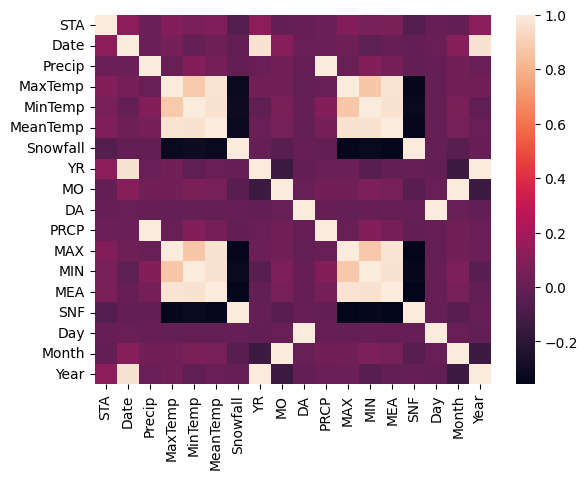

In [205]:
sns.heatmap(df.corr())
plt.show()

In [206]:
df.drop(['Day','Month','Year'],axis=1,inplace=True)

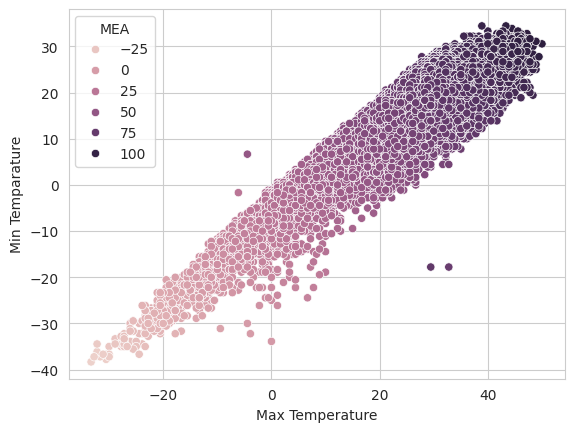

In [211]:
sns.set_style("whitegrid")
sns.scatterplot(x="MaxTemp",y="MinTemp",hue="MEA",data=df)
plt.xlabel("Max Temperature")
plt.ylabel("Min Temparature")
plt.show()

In [212]:
X= df.drop("MaxTemp",axis=1)
y= df["MaxTemp"]

In [213]:
X.head()

,STA,Date,Precip,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-07-01,1.02,22.22,23.89,0.00,42,7,1,0.04,78.00,72.00,75.00,0.00
1,10001,1942-07-02,0.00,21.67,25.56,0.00,42,7,2,0.00,84.00,71.00,78.00,0.00
2,10001,1942-07-03,2.54,22.22,24.44,0.00,42,7,3,0.10,79.00,72.00,76.00,0.00
3,10001,1942-07-04,2.54,22.22,24.44,0.00,42,7,4,0.10,80.00,72.00,76.00,0.00
4,10001,1942-07-05,0.00,21.67,24.44,0.00,42,7,5,0.00,80.00,71.00,76.00,0.00


In [214]:
y.head()

,MaxTemp
0,25.56
1,28.89
2,26.11
3,26.67
4,26.67


In [215]:
# train-test-split

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [223]:
X_train.corr()

,STA,Date,Precip,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
STA,1.00,0.12,0.01,0.06,0.08,-0.06,0.12,-0.01,0.00,0.01,0.08,0.05,0.07,-0.06
Date,0.12,1.00,0.02,-0.00,0.03,-0.01,0.97,0.11,0.01,0.02,0.03,-0.02,0.00,-0.01
Precip,0.01,0.02,1.00,0.09,0.05,-0.01,0.01,0.04,0.00,1.00,0.00,0.09,0.05,-0.01
MinTemp,0.06,-0.00,0.09,1.00,0.97,-0.31,-0.02,0.07,-0.00,0.09,0.87,1.00,0.97,-0.32
MeanTemp,0.08,0.03,0.05,0.97,1.00,-0.32,0.01,0.05,-0.00,0.05,0.97,0.96,1.00,-0.34
Snowfall,-0.06,-0.01,-0.01,-0.31,-0.32,1.00,-0.00,-0.04,-0.00,-0.01,-0.34,-0.32,-0.34,1.00
YR,0.12,0.97,0.01,-0.02,0.01,-0.00,1.00,-0.14,-0.01,0.01,0.02,-0.04,-0.01,-0.00
MO,-0.01,0.11,0.04,0.07,0.05,-0.04,-0.14,1.00,0.01,0.04,0.04,0.07,0.06,-0.05
DA,0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.01,0.01,1.00,0.00,-0.00,0.00,0.00,-0.00
PRCP,0.01,0.02,1.00,0.09,0.05,-0.01,0.01,0.04,0.00,1.00,0.00,0.09,0.05,-0.01


In [225]:
print(X_train.corr().iloc[0,2])

0.008369446742766266


In [226]:
def corellation_for_dropping(df,threshold):
  columns_to_drop = set()
  corr=df.corr()
  for i in range(len(corr.columns)):
    for j in range(i):                                       #Korelasyonu çıkardık bu fonksiyonla yüksek korelasyonlu columnları
      if abs(corr.iloc[i,j]) > threshold:
          columns_to_drop.add(corr.columns[i])
  return columns_to_drop

In [227]:
columns_dropping=corellation_for_dropping(X_train, 0.85)

In [228]:
columns_dropping

{'MAX', 'MEA', 'MIN', 'MeanTemp', 'PRCP', 'SNF', 'YR'}

In [229]:
X_train.drop(columns_dropping, axis=1,inplace=True)
X_test.drop(columns_dropping, axis=1,inplace=True)

In [232]:
X_train.head()

,STA,Date,Precip,MinTemp,Snowfall,MO,DA
9278,10703,1945-09-27,0.00,25.00,0.00,9,27
18364,11101,1944-05-19,0.00,21.11,0.00,5,19
46563,16405,1945-03-18,0.00,-3.89,2.54,3,18
7912,10701,1944-06-18,0.00,22.22,0.00,6,18
64350,31501,1944-02-10,0.00,18.33,0.00,2,10


In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
scaler = StandardScaler()

In [236]:
# Eğitim ve test setinden tarih sütununu çıkarıyoruz
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

# Şimdi ölçeklendirme hatasız çalışacaktır
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

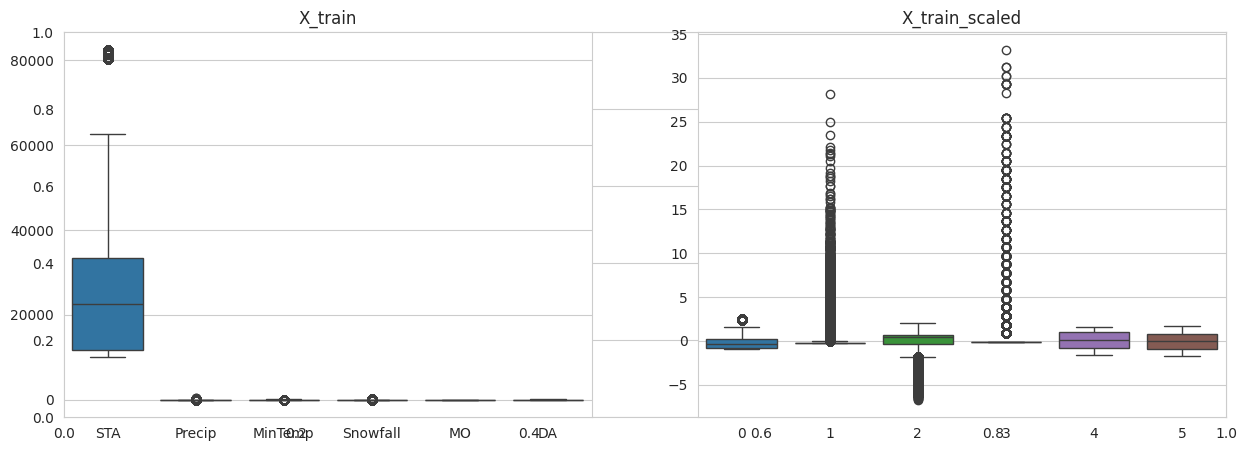

In [237]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
linear = LinearRegression()

In [240]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [241]:
y_pred = linear.predict(X_test_scaled)

In [242]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Mean Absolute Error :  3.1233899122771347
Mean Squarred Error :  17.028404951479885
R2 SCORE :    0.7757415607609639


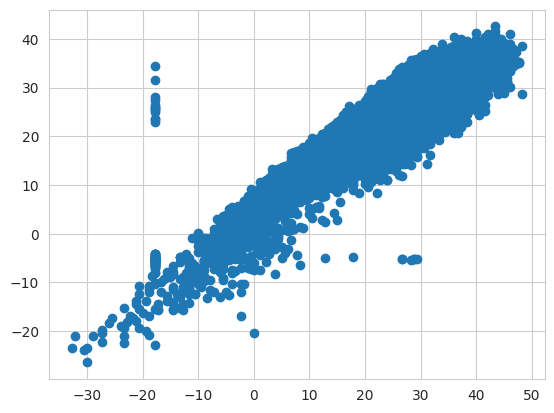

In [243]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error :  3.1879503378566363
Mean Squarred Error :  18.831975826260816
R2 SCORE :    0.7519891311829836


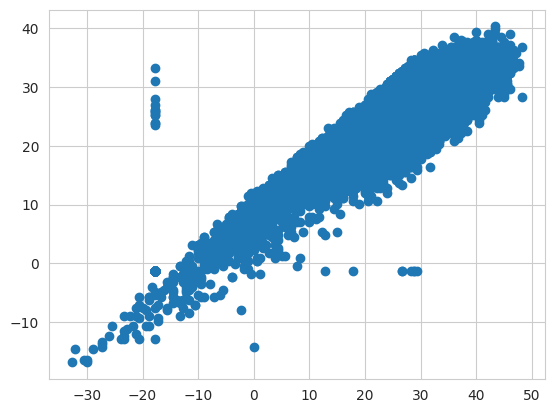

In [244]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error :  3.123384234320799
Mean Squarred Error :  17.028407850510746
R2 SCORE :    0.7757415225816899


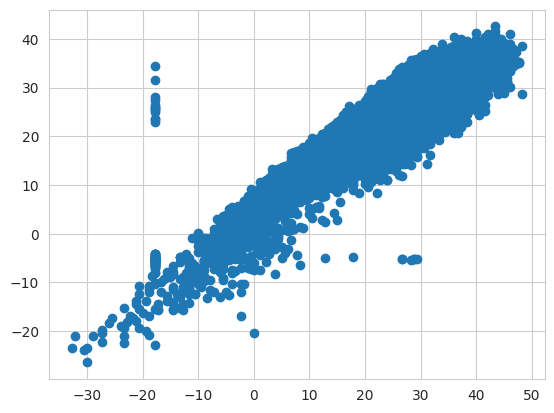

In [245]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error :  3.462386608421572
Mean Squarred Error :  25.535191655617663
R2 SCORE :    0.6637100043911742


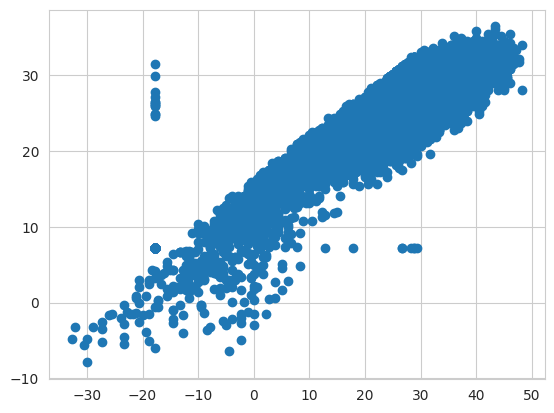

In [246]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [247]:
# Lasso Cross Validation

In [248]:
from sklearn.linear_model import LassoCV

Mean Absolute Error :  3.1226761463989883
Mean Squarred Error :  17.029035618685676
R2 SCORE :    0.7757332550832652


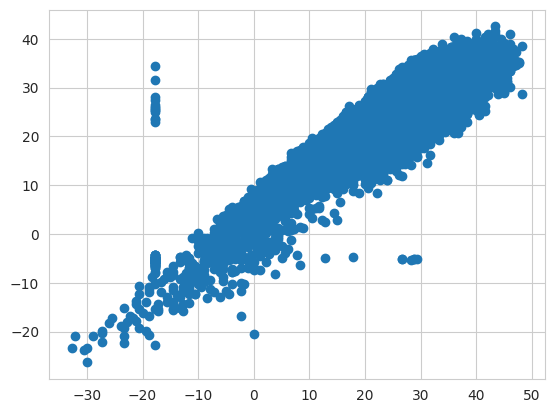

In [249]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [253]:
lasso_cv.alpha_

np.float64(0.007668969040393087)

In [250]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error :  3.1233331480586557
Mean Squarred Error :  17.028434640045536
R2 SCORE :    0.7757411697724117


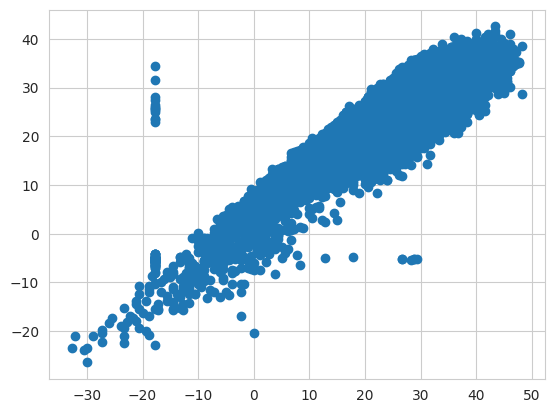

In [254]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [257]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [258]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error :  3.119089710121986
Mean Squarred Error :  17.035521514054373
R2 SCORE :    0.7756478379947829


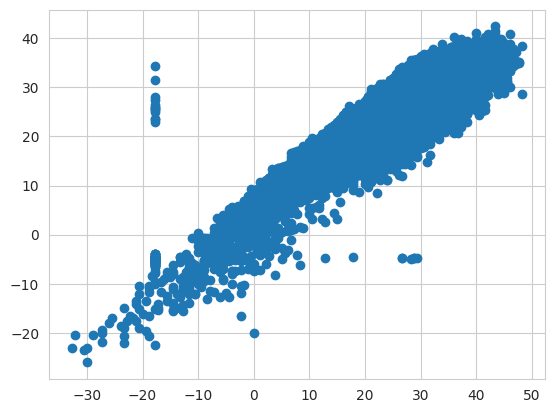

In [259]:
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled,y_train)
y_pred= elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [261]:
elastic_cv.alphas_

array([15.34, 14.3 , 13.34, 12.44, 11.6 , 10.82, 10.09,  9.41,  8.78,
        8.19,  7.63,  7.12,  6.64,  6.19,  5.77,  5.39,  5.02,  4.68,
        4.37,  4.07,  3.8 ,  3.54,  3.3 ,  3.08,  2.87,  2.68,  2.5 ,
        2.33,  2.17,  2.03,  1.89,  1.76,  1.64,  1.53,  1.43,  1.33,
        1.24,  1.16,  1.08,  1.01,  0.94,  0.88,  0.82,  0.76,  0.71,
        0.66,  0.62,  0.58,  0.54,  0.5 ,  0.47,  0.44,  0.41,  0.38,
        0.35,  0.33,  0.31,  0.29,  0.27,  0.25,  0.23,  0.22,  0.2 ,
        0.19,  0.18,  0.16,  0.15,  0.14,  0.13,  0.12,  0.12,  0.11,
        0.1 ,  0.09,  0.09,  0.08,  0.08,  0.07,  0.07,  0.06,  0.06,
        0.05,  0.05,  0.05,  0.04,  0.04,  0.04,  0.04,  0.03,  0.03,
        0.03,  0.03,  0.02,  0.02,  0.02,  0.02,  0.02,  0.02,  0.02,
        0.02])